In [7]:
data <- read.csv('data_zipped.bz2')
head(data)

STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,⋯,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
1,4/18/1950 0:00:00,0130,CST,97,MOBILE,AL,TORNADO,0,,⋯,,,,,3040,8812,3051,8806,,1
1,4/18/1950 0:00:00,0145,CST,3,BALDWIN,AL,TORNADO,0,,⋯,,,,,3042,8755,0,0,,2
1,2/20/1951 0:00:00,1600,CST,57,FAYETTE,AL,TORNADO,0,,⋯,,,,,3340,8742,0,0,,3
1,6/8/1951 0:00:00,0900,CST,89,MADISON,AL,TORNADO,0,,⋯,,,,,3458,8626,0,0,,4
1,11/15/1951 0:00:00,1500,CST,43,CULLMAN,AL,TORNADO,0,,⋯,,,,,3412,8642,0,0,,5
1,11/15/1951 0:00:00,2000,CST,77,LAUDERDALE,AL,TORNADO,0,,⋯,,,,,3450,8748,0,0,,6


In [8]:
data$EVTYPE = toupper(data$EVTYPE)
data[data$EVTYPE == "TSTM WIND", ]$EVTYPE = "THUNDERSTORM WIND"
data[data$EVTYPE == "THUNDERSTORM WINDS", ]$EVTYPE = "THUNDERSTORM WIND"
data[data$EVTYPE == "RIVER FLOOD", ]$EVTYPE = "FLOOD"
data[data$EVTYPE == "HURRICANE/TYPHOON", ]$EVTYPE = "HURRICANE-TYPHOON"
data[data$EVTYPE == "HURRICANE", ]$EVTYPE = "HURRICANE-TYPHOON"
length(unique(data$EVTYPE))

[1] 894

In [9]:
colnames(data)

[1] "STATE__"    "BGN_DATE"   "BGN_TIME"   "TIME_ZONE"  "COUNTY"    
 [6] "COUNTYNAME" "STATE"      "EVTYPE"     "BGN_RANGE"  "BGN_AZI"   
[11] "BGN_LOCATI" "END_DATE"   "END_TIME"   "COUNTY_END" "COUNTYENDN"
[16] "END_RANGE"  "END_AZI"    "END_LOCATI" "LENGTH"     "WIDTH"     
[21] "F"          "MAG"        "FATALITIES" "INJURIES"   "PROPDMG"   
[26] "PROPDMGEXP" "CROPDMG"    "CROPDMGEXP" "WFO"        "STATEOFFIC"
[31] "ZONENAMES"  "LATITUDE"   "LONGITUDE"  "LATITUDE_E" "LONGITUDE_"
[36] "REMARKS"    "REFNUM"

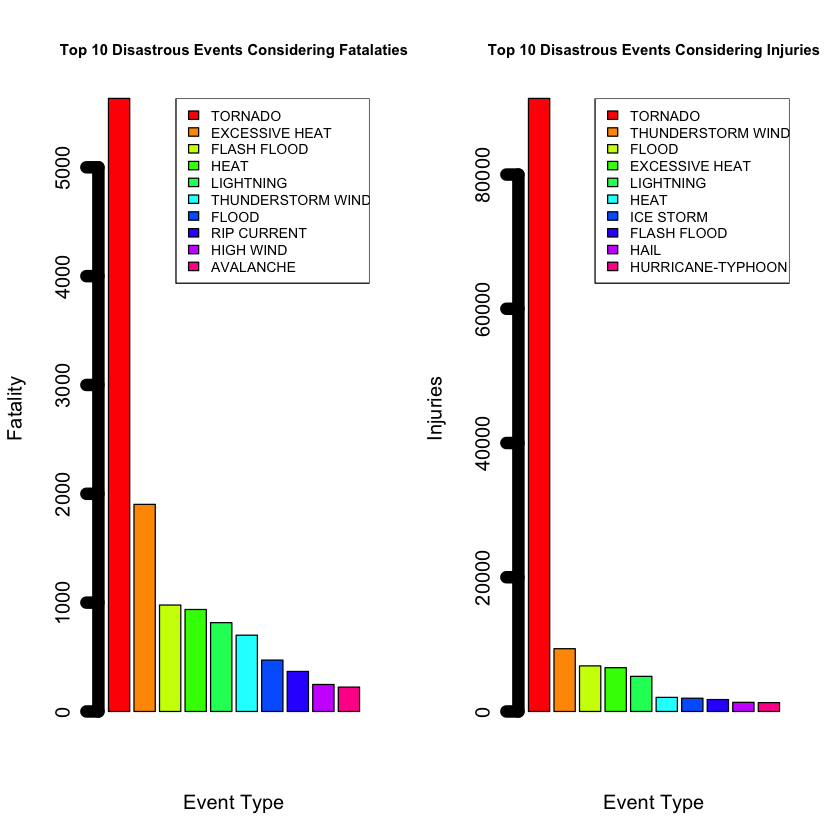

In [45]:
fatalaties <- aggregate(FATALITIES ~ EVTYPE, data = data, sum)
fatalaties_desc <- fatalaties[order(fatalaties$FATALITIES, decreasing = TRUE), ]
par(mfrow=c(1,2))
barplot(fatalaties_desc[1:10, 2],  
     xlab="Event Type", ylab="Fatality", lwd=10, col = rainbow(10))
legend("topright", 
       legend= fatalaties_desc[1:10, 1], 
     fill = rainbow(10),ncol = 1,
       cex = 0.70)
title(main="Top 10 Disastrous Events Considering Fatalaties", cex.main = 0.75)

injuries <- aggregate(INJURIES ~ EVTYPE, data = data, sum)
injuries_desc <- injuries[order(injuries$INJURIES, decreasing = TRUE), ]
barplot(injuries_desc[1:10, 2], 
     xlab="Event Type", ylab="Injuries", lwd=10, col = rainbow(10))
legend("topright", 
       legend= injuries_desc[1:10, 1], 
     fill = rainbow(10),ncol = 1,
       cex = 0.70)
title(main="Top 10 Disastrous Events Considering Injuries", cex.main = 0.75)

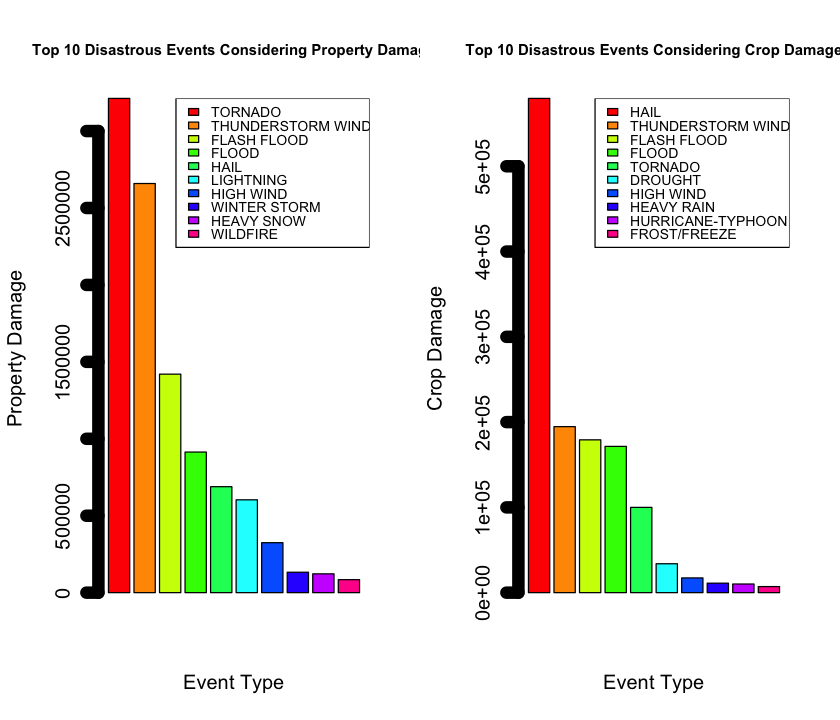

In [53]:
options(repr.plot.height = 6)
par(mfrow=c(1,2))
#layout(heights = c(1,2))
propdmg <- aggregate(PROPDMG ~ EVTYPE, data = data, sum)
propdmg_desc <- propdmg[order(propdmg$PROPDMG, decreasing = TRUE), ]
barplot(propdmg_desc[1:10, 2], 
     xlab="Event Type", ylab="Property Damage", lwd=10, col = rainbow(10))
legend("topright", 
       legend= propdmg_desc[1:10, 1], 
     fill = rainbow(10),ncol = 1,
       cex = 0.70)
title(main="Top 10 Disastrous Events Considering Property Damage", cex.main = 0.75)


cropdmg <- aggregate(CROPDMG ~ EVTYPE, data = data, sum)
cropdmg_desc <- cropdmg[order(cropdmg$CROPDMG, decreasing = TRUE), ]
barplot(cropdmg_desc[1:10, 2], 
     xlab="Event Type", ylab="Crop Damage", lwd=10, col = rainbow(10))
legend("topright", 
       legend= cropdmg_desc[1:10, 1], 
     fill = rainbow(10),ncol = 1,
       cex = 0.70)
title(main="Top 10 Disastrous Events Considering Crop Damage", cex.main = 0.75)

# Test Codes 

In [65]:
x <- c(0.61, 0.93, 0.83, 0.35, 0.54, 0.16, 0.91, 0.62, 0.62)
y <- c(0.67, 0.84, 0.6, 0.18, 0.85, 0.47, 1.1, 0.65, 0.36)
fit <- lm(y ~ x)
coefTable <- coef(summary(fit))
(pval <- coefTable[2, 4])

[1] 0.05296439

In [66]:
coefTable

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.1884572,0.2061290,0.9142681,0.39098029
x,0.7224211,0.3106531,2.3254912,0.05296439



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27636 -0.18807  0.01364  0.16595  0.27143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.1885     0.2061   0.914    0.391  
x             0.7224     0.3107   2.325    0.053 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.223 on 7 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.3552 
F-statistic: 5.408 on 1 and 7 DF,  p-value: 0.05296
